In [24]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [25]:
import pandas as pd
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df = pd.read_csv("complaints.csv")

In [28]:
df = df[['Product', 'Consumer complaint narrative']].dropna()
df = df.rename(columns={'Consumer complaint narrative': 'text', 'Product': 'category'})
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Dataset loaded successfully!
Shape: (3410356, 2)


,category,text
7,"Credit reporting, credit repair services, or o...",These are not my accounts.
15,Credit reporting or other personal consumer re...,Kindly address this issue on my credit report....
21,Credit reporting or other personal consumer re...,There are XXXX collections being reported to t...
42,Credit reporting or other personal consumer re...,"Violation of Gramm-Leach-Bliley Act ( GLBA ), ..."
66,Credit reporting or other personal consumer re...,"Good day, filing this complaint to follow up m..."


In [29]:
target_categories = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]
df = df[df['category'].isin(target_categories)]
df['label'] = df['category'].replace({
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
})
print("Filtered dataset shape:", df.shape)

Filtered dataset shape: (1322795, 3)


C:\Users\Laptop\AppData\Local\Temp\ipykernel_22164\3948214380.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['category'].replace({


In [30]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stop])

df['clean_text'] = df['text'].apply(clean_text)
print(" Text cleaned successfully!")
df[['text', 'clean_text']].head()

 Text cleaned successfully!


,text,clean_text
7,These are not my accounts.,accounts
122,"I wrote three requests, the unverified account...",wrote three requests unverified accounts liste...
174,I've found that my credit report has erroneous...,ive found credit report erroneous information ...
204,RE : Attentively review my formal writ compose...,attentively review formal writ composed declar...
216,I have filed a dispute in regards to the incor...,filed dispute regards incorrect information th...


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)
print(" Data split done - Training size:", len(X_train), "Test size:", len(X_test))

 Data split done - Training size: 1058236 Test size: 264559


In [32]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(" TF-IDF vectorization complete!")

 TF-IDF vectorization complete!


In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [34]:
acc = accuracy_score(y_test, y_pred)
print(" Model Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Model Accuracy: 90.67 %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93    161445
           1       0.87      0.83      0.85     74366
           2       0.68      0.37      0.48      1866
           3       0.92      0.93      0.93     26882

    accuracy                           0.91    264559
   macro avg       0.85      0.77      0.80    264559
weighted avg       0.91      0.91      0.91    264559



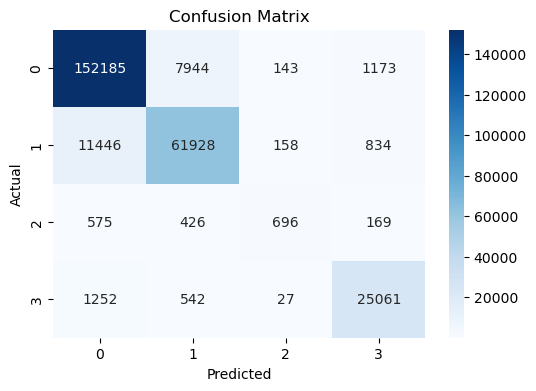

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
sample_texts = [
    "My credit report has wrong accounts listed",
    "They keep calling for a loan I have already repaid",
    "Mortgage payment was processed twice by the bank",
    "My loan application is delayed without reason"
]

clean_samples = [clean_text(t) for t in sample_texts]
sample_vec = vectorizer.transform(clean_samples)
preds = model.predict(sample_vec)

label_map = {0: "Credit reporting", 1: "Debt collection", 2: "Consumer Loan", 3: "Mortgage"}
for text, pred in zip(sample_texts, preds):
    print(f"Complaint: {text}\n→ Predicted Category: {label_map[pred]}\n")

Complaint: My credit report has wrong accounts listed
→ Predicted Category: Credit reporting

Complaint: They keep calling for a loan I have already repaid
→ Predicted Category: Debt collection

Complaint: Mortgage payment was processed twice by the bank
→ Predicted Category: Mortgage

Complaint: My loan application is delayed without reason
→ Predicted Category: Mortgage

